Testing if trignometric function is working

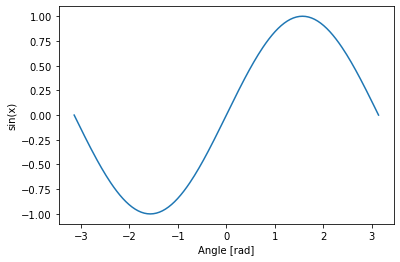

In [1]:
import numpy as np
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 201)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

Uploading the song

In [2]:
import librosa
y, sr = librosa.load("Tere Hi Hum - Prateek Kuhad _ Official Lyric Video.wav")
D = librosa.stft(y)

Stft is a short form for Short-Time Fourier Transform (It represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows)

In [3]:
s = np.abs(librosa.stft(y)**2)
chroma = librosa.feature.chroma_stft(S=s, sr=sr)

Chroma is a type of transformation of sounds into numerical values. It is a 12-element vector that measures energy from the sound pitch

In [4]:
print(chroma)

[[0.         0.         0.9718841  ... 0.         0.         0.        ]
 [0.         0.         0.98931324 ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.9373835  ... 0.         0.         0.        ]
 [0.         0.         0.95137525 ... 0.         0.         0.        ]
 [0.         0.         0.965715   ... 0.         0.         0.        ]]


Transforming Chroma to another data format

In [5]:
chroma = np.cumsum(chroma)

Visualizing the code

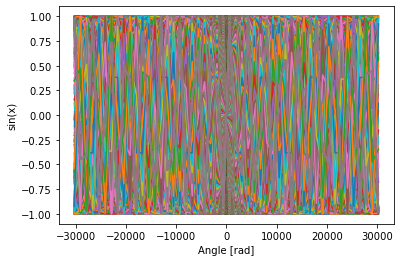

In [15]:
import matplotlib.pylab as plt
x = np.linspace(-chroma, chroma)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

Using Librosa to show enhanced Chroma and Chroma variants

In [16]:
import matplotlib.pyplot as plt
from librosa import *
y, sr = librosa.load("Tere Hi Hum - Prateek Kuhad _ Official Lyric Video.wav")

[Text(0, 0.5, 'Default chroma')]

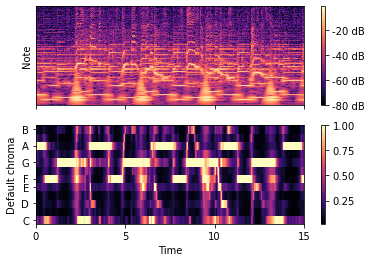

In [18]:
import librosa.display
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = tuple([slice(None), slice(*list(librosa.time_to_frames([45, 60])))])
# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                                y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()
img2 = librosa.display.specshow(chroma_orig[idx], y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')